In [422]:
import uproot
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import awkward as ak
import 
import mplhep as hep
hep.style.use(hep.style.ROOT) # For now ROOT defaults to CMS

In [425]:
path = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/mmatthew/Patatrack15/Samples/CloseByPion/histo"

cp_energy = []
tkx_energy = []
tkx_nclus = []
tkx_barycentre = []
tkx_energyfraction = []
frac_energy = []
tkx_numtkx = []
cell_type = []
weighted_bar_x = []
weighted_bar_y = []
weighted_bar_z = []


for root, dirs, files in os.walk(path):
    for i,file in enumerate(files):
        if i >= 50 :
            break
        f = uproot.open(os.path.join(path,file))
        energy = np.array([ak.sum(x) for x in f["ticlDumper/trackstersMerged"]["raw_energy"].array()])
        if (energy==0).any(): 
            print(file, "contains faulty event!!! Excluded for now!!!")
            continue       
        
        cp_energy.append([ak.sum(x) for x in f["ticlDumper/simtrackstersCP"]["regressed_energy"].array()])
        tkx_energy.append([ak.sum(x) for x in f["ticlDumper/trackstersMerged"]["raw_energy"].array()])  
        tkx_numtkx.append([ak.count(x) for x in f["ticlDumper/trackstersMerged"]["raw_energy"].array()])
        
        bar_x = f["ticlDumper/trackstersMerged"]["barycenter_x"].array(library="np")
        bar_y = f["ticlDumper/trackstersMerged"]["barycenter_y"].array(library="np")
        bar_z = f["ticlDumper/trackstersMerged"]["barycenter_z"].array(library="np")

        weights = [np.array(x)/np.sum(np.array(x)) for x in f["ticlDumper/trackstersMerged"]["raw_energy"].array()]

        weighted_bar_x.append([np.sum([x*l]) for x, l in zip(weights, bar_x)])
        weighted_bar_y.append([np.sum([x*l]) for x, l in zip(weights, bar_y)])
        weighted_bar_z.append([np.sum([x*l]) for x, l in zip(weights, bar_z)])
        
        cell_type.append([np.array(ak.sum(x,axis=0)) for x in f["ticlDumper/trackstersMerged"]["raw_energy_perCellType"].array()])
                

        
cell_type = np.array([y for x in cell_type for y in x])
frac = np.array(cell_type)/np.array(tkx_energy).reshape(-1, 1)
d1, d2, d3, d4, d5, d6, d7 = np.hsplit(frac, 7)
cp_energy = np.array(cp_energy).flatten()
tkx_energy = np.array(tkx_energy).flatten()
tkx_numtkx = np.array(tkx_numtkx).flatten()
weighted_bar_x = np.array(weighted_bar_x).flatten()
weighted_bar_y = np.array(weighted_bar_y).flatten()
weighted_bar_z = np.array(weighted_bar_z).flatten()
         


histo_9373196_109.root contains faulty event!!! Excluded for now!!!
histo_9373196_127.root contains faulty event!!! Excluded for now!!!
histo_9373196_128.root contains faulty event!!! Excluded for now!!!
histo_9373196_13.root contains faulty event!!! Excluded for now!!!
histo_9373196_137.root contains faulty event!!! Excluded for now!!!
histo_9373196_14.root contains faulty event!!! Excluded for now!!!
histo_9373196_142.root contains faulty event!!! Excluded for now!!!


# Distributions

In [437]:
np.array(cp_energy).flatten()
np.array(tkx_energy).flatten()

frac = np.array(tkx_energy).flatten()/np.array(cp_energy).flatten()
frac = frac[np.where(frac<1)]

Text(0, 1, 'N')

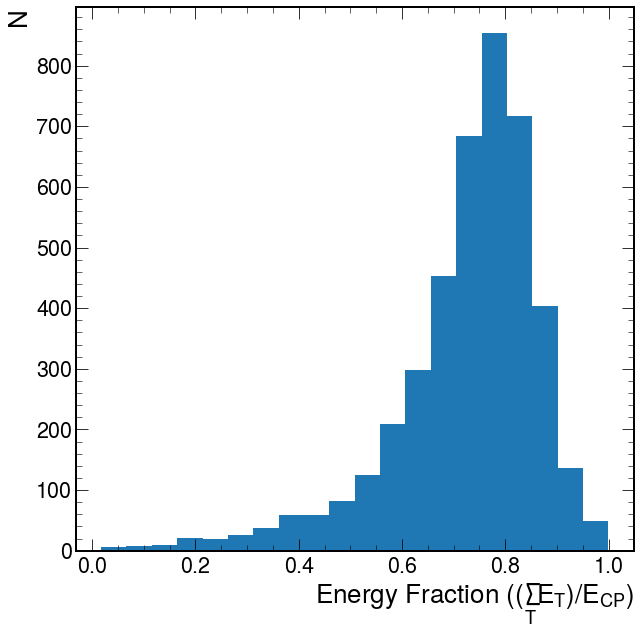

In [438]:
# Energy

plt.hist(frac,bins=20)
plt.xlabel(r"Energy Fraction ($(\sum_T E_T)/E_{CP}$)")
plt.ylabel("N")

Text(0, 1, 'N')

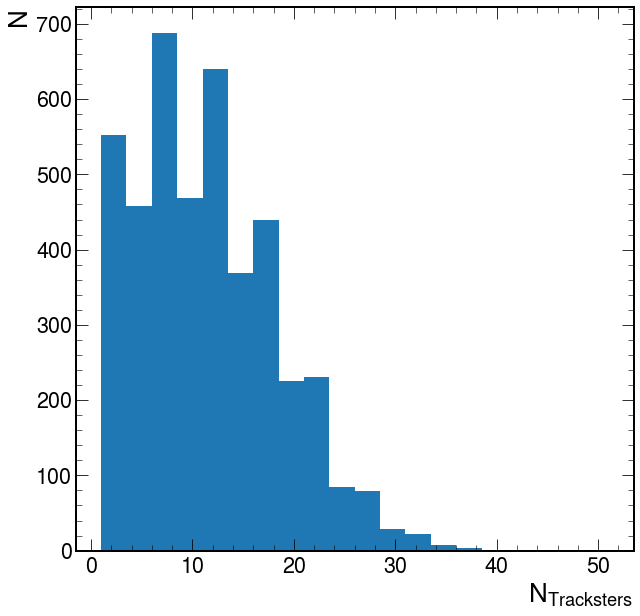

In [390]:
# NClusters

plt.hist(tkx_numtkx,bins=20)
plt.xlabel(r"$N_{Tracksters}$")
plt.ylabel("N")

In [391]:
weighted_bar_r

array([ 26.491974,  40.085884, 195.84225 , ..., 258.4715  ,  26.359875,
       180.27086 ], dtype=float32)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-216.93054199, -208.44180969, -199.95307739, -191.46434509,
        -182.97561279, -174.48688049, -165.99814819, -157.50941589,
        -149.02068359, -140.53195129, -132.04321899, -123.55448669,
        -115.06575439, -106.57702209,  -98.08828979,  -89.5995575 ,
         -81.1108252 ,  -72.6220929 ,  -64.1333606 ,  -55.6446283 ,
         -47.155896  ,  -38.6671637 ,  -30.1784314 ,  -21.6896991 ,
         -13.2009668 ,   -4.7122345 ,    3.7764978 ,   12.2652301 ,
          20.7539624 ,   29.2426947 ,   37.731427  ,   46.2201593 ,
          54.7088916 ,   63.1976239 ,   71.6863562 ,   80.1750885 ,
          88.6638208 ,   97.1525531 ,  105.6412854 ,  114.1300177 ,
         122.61875   ,  131.1074823 ,  139.5962146 ,  148.0849469 ,
   

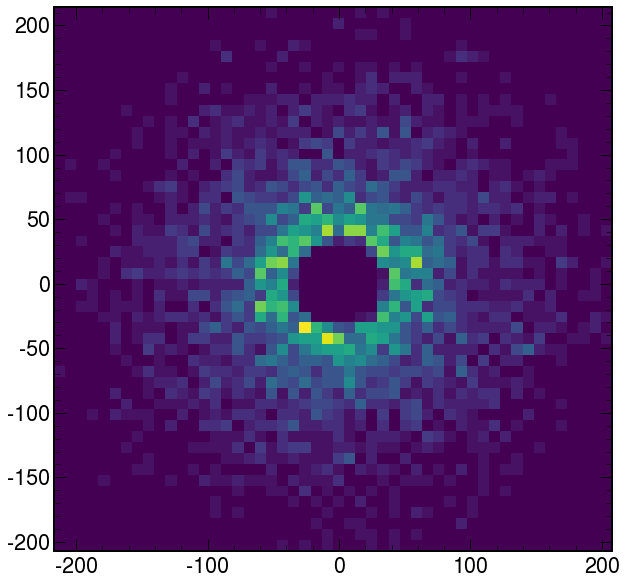

In [392]:
weighted_bar_r = np.sqrt(weighted_bar_x**2 + weighted_bar_y**2)
plt.hist2d(weighted_bar_x, weighted_bar_y, bins = 50)

(array([[0., 1., 0., ..., 0., 0., 0.],
        [4., 1., 0., ..., 0., 0., 0.],
        [5., 1., 4., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([331.84176636, 335.46031311, 339.07885986, 342.69740662,
        346.31595337, 349.93450012, 353.55304688, 357.17159363,
        360.79014038, 364.40868713, 368.02723389, 371.64578064,
        375.26432739, 378.88287415, 382.5014209 , 386.11996765,
        389.7385144 , 393.35706116, 396.97560791, 400.59415466,
        404.21270142, 407.83124817, 411.44979492, 415.06834167,
        418.68688843, 422.30543518, 425.92398193, 429.54252869,
        433.16107544, 436.77962219, 440.39816895, 444.0167157 ,
        447.63526245, 451.2538092 , 454.87235596, 458.49090271,
        462.10944946, 465.72799622, 469.34654297, 472.96508972,
        476.58363647, 480.20218323, 483.82072998, 487.43927673,
        491.05782349, 494.67637024, 498.2949169

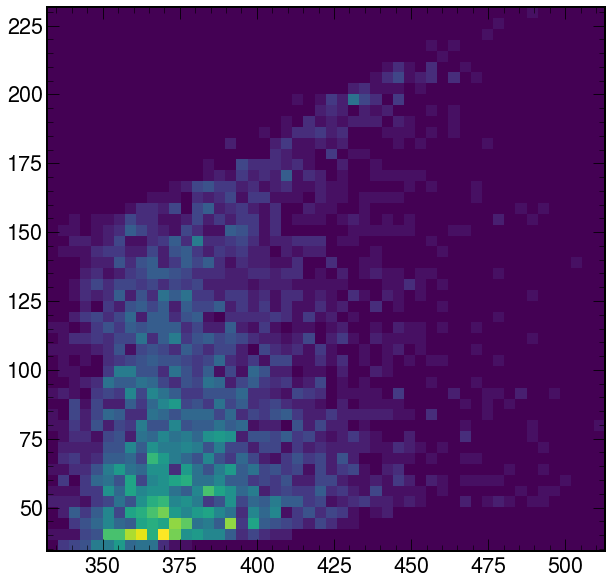

In [395]:
weighted_bar_r = np.sqrt(weighted_bar_x**2 + weighted_bar_y**2)
plt.hist2d(weighted_bar_z, weighted_bar_r, bins = 50)

Text(1, 0, 'CE_E_120')

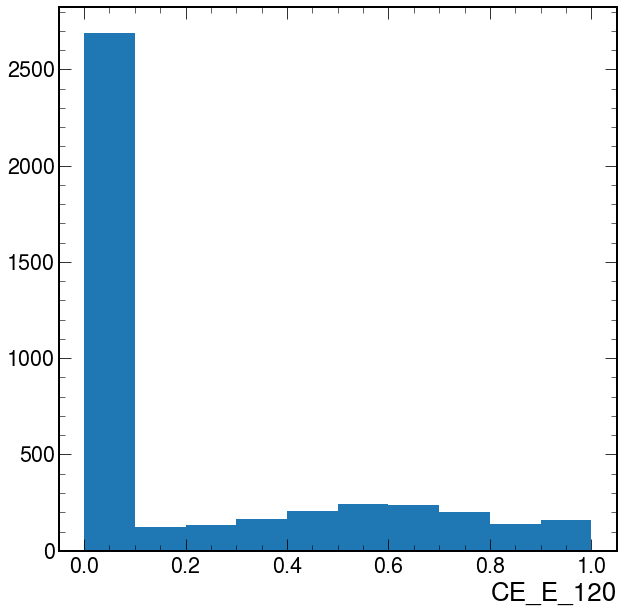

In [410]:
plt.hist(d1)
plt.xlabel("CE_E_120")

Text(1, 0, 'CE_E_200')

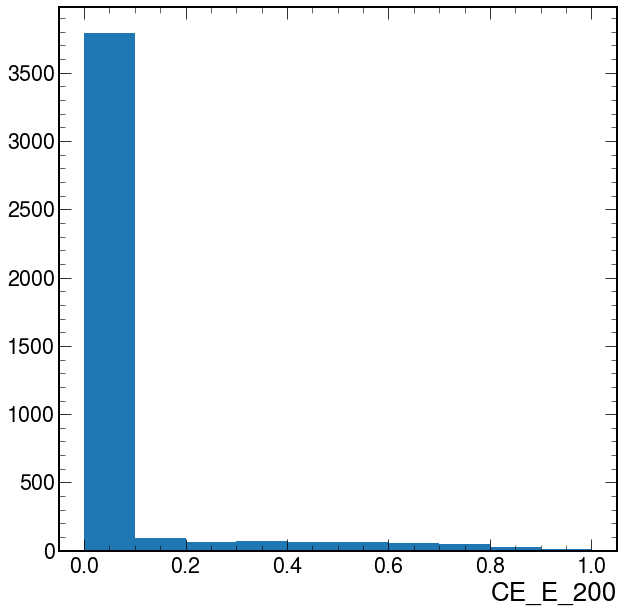

In [411]:
plt.hist(d2)
plt.xlabel("CE_E_200")

Text(1, 0, 'CE_E_300')

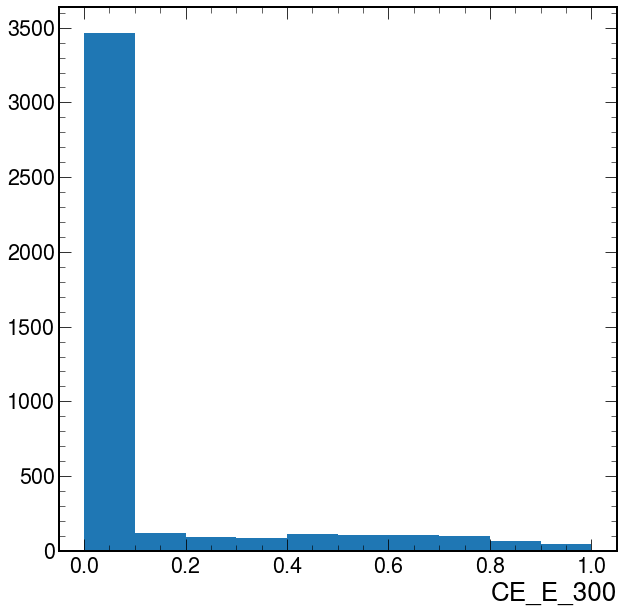

In [412]:
plt.hist(d3)
plt.xlabel("CE_E_300")

Text(1, 0, 'CE_H_120')

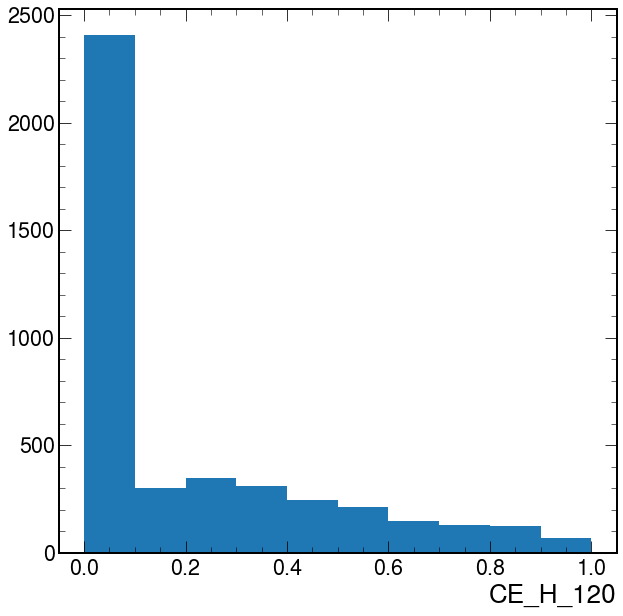

In [413]:
plt.hist(d4)
plt.xlabel("CE_H_120")

Text(1, 0, 'CE_H_200')

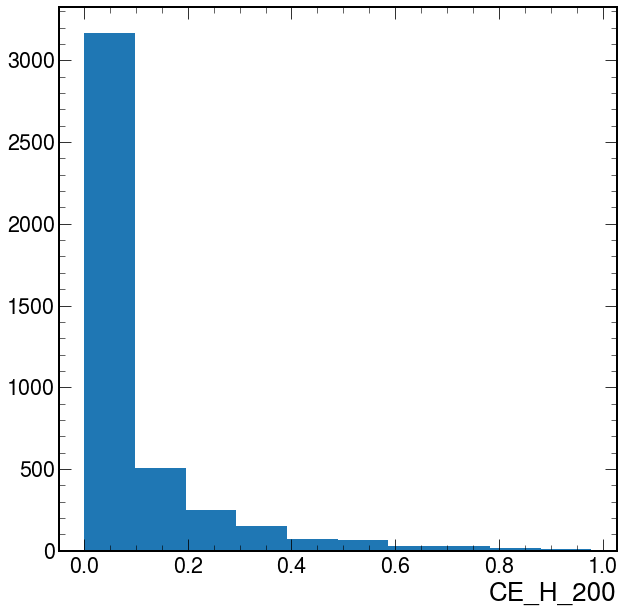

In [414]:
plt.hist(d5)
plt.xlabel("CE_H_200")

Text(1, 0, 'CE_H_300')

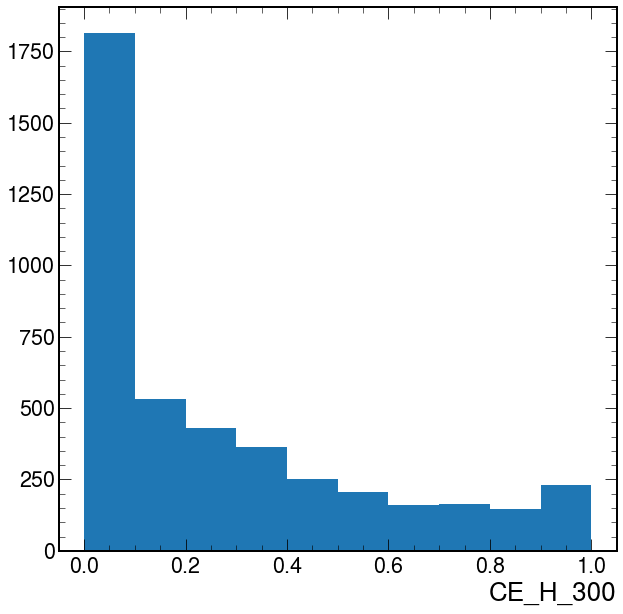

In [415]:
plt.hist(d6)
plt.xlabel("CE_H_300")

Text(1, 0, 'CE_H_SCINT')

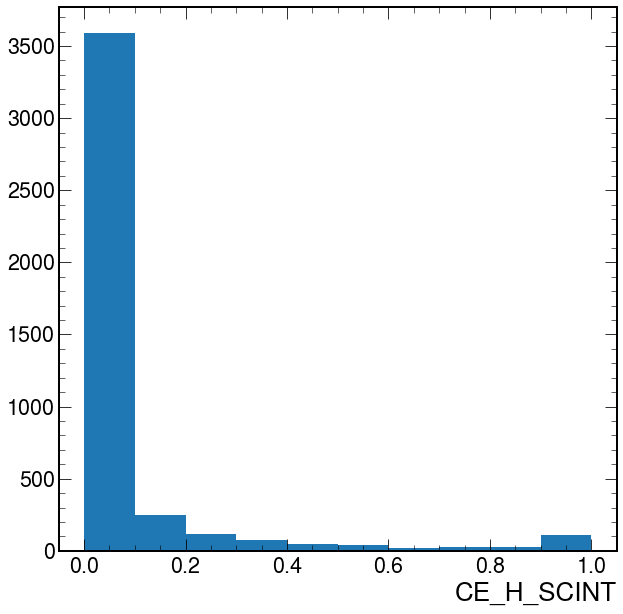

In [416]:
plt.hist(d7)
plt.xlabel("CE_H_SCINT")

# Correlation

In [445]:
frac.shape

(4254,)

In [447]:

d = {
    "frac": np.array(tkx_energy).flatten()/np.array(cp_energy).flatten(),
    "cp_energy":cp_energy,
    "tkx_energy":tkx_energy,
    "tkx_numtkx":tkx_numtkx,
    "weighted_bar_x":weighted_bar_x,
    "weighted_bar_y":weighted_bar_y,
    "weighted_bar_z":weighted_bar_z,
    "CE_E_120":d1.flatten(),
    "CE_E_200":d2.flatten(),
    "CE_E_300":d3.flatten(),
    "CE_H_120":d4.flatten(),
    "CE_H_200":d5.flatten(),
    "CE_H_300":d6.flatten(),
    "CE_H_SCINT":d7.flatten()
}

df = pd.DataFrame(d)

<Axes: >

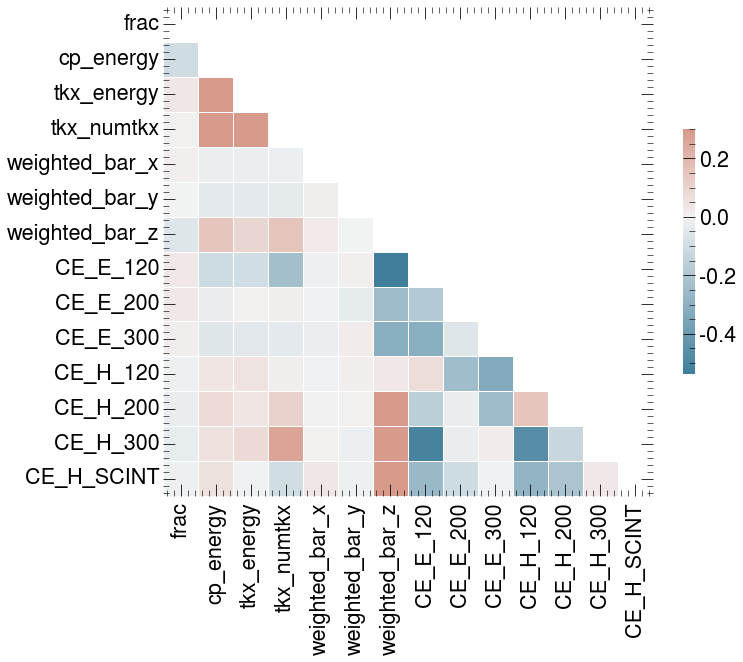

In [448]:
import seaborn as sns

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [419]:
df

,cp_energy,tkx_energy,tkx_numtkx,weighted_bar_x,weighted_bar_y,weighted_bar_z
0,164.255783,45.295815,7,18.732655,192.284851,421.885345
1,116.849686,74.627670,14,-28.345001,70.597618,375.322418
2,292.242126,229.001266,15,138.481384,-54.397655,372.905762
3,34.313473,21.723742,2,46.231842,33.316765,390.635498
4,367.739838,344.971191,10,10.181309,-37.242752,370.455475
...,...,...,...,...,...,...
4295,345.670349,253.274963,17,99.262222,56.793346,365.470886
4296,544.190674,443.024353,29,-0.377544,-96.321106,383.040283
4297,383.174164,307.977203,2,-182.766937,-26.075588,457.213501
4298,431.660828,294.022766,19,18.639246,-40.522018,376.674133


## TrackstersMerged

In [ ]:
f["ticlDumper/trackstersMerged"].keys()

In [ ]:
f["ticlDumper/trackstersMerged"]["raw_energy"].array()[3]

In [ ]:
f["ticlDumper"].keys()

In [ ]:
## Candidates

In [ ]:
f["ticlDumper/candidates"].keys()

In [ ]:
f["ticlDumper/candidates"]["candidate_energy"].array()[4]

## SimTracksters

In [ ]:
cp_energy = [np.sum(x) for x in f["ticlDumper/simtrackstersCP"]["regressed_energy"].array()]
cp_energy = np.array(cp_energy)

In [ ]:
tkx_energy =[np.sum(x) for x in f["ticlDumper/trackstersMerged"]["raw_energy"].array()]
tkx_energy = np.array(tkx_energy)

In [ ]:
frac_energy = tkx_energy/cp_energy

In [ ]:
frac_energy

In [ ]:
plt.hist(frac_energy)

In [ ]:
import uproot
import awkward as ak
import numpy as np

def zipTracksters(ar:ak.Array, name="trackster"):
    try:
        return ak.zip({key: ar[key] for key in ar.fields if (key not in ["event", "vertices_multiplicity", "NTracksters"]) and not ( key.startswith("EV") or key.startswith("eVector0") or key.startswith("sigmaPCA") or key.startswith("boundary"))}, depth_limit=2, with_name=name)
    except ValueError as e:
        for i in range(3, len(ar.fields)):
            try:
                ak.zip({key: ar[key] for key in ar.fields[:i] if (key not in ["event", "vertices_multiplicity", "NTracksters"]) and not ( key.startswith("EV") or key.startswith("eVector0") or key.startswith("sigmaPCA") or key.startswith("boundary"))}, depth_limit=2, with_name=name)
            except:
                raise ValueError("Field " + ar.fields[i] + " failed to be zipped", e)

def splitEndcaps(ar:ak.Array):
    return ak.concatenate([ar[ar.barycenter_eta < 0], ar[ar.barycenter_eta > 0]])


class InputSample:
    def __init__(self, pathToHisto:str, tsArgs=dict(filter_name=["raw_energy", "raw_energy_perCellType", "barycenter_*"]), cpArgs=dict(filter_name=["regressed_energy", "barycenter_*"])) -> None:
        self.dumper_tree = uproot.open(f"{pathToHisto}:ticlDumper")
        self.tracksters = self.dumper_tree["trackstersMerged"].arrays(**tsArgs)
        self.caloparticles = self.dumper_tree["simtrackstersCP"].arrays(**cpArgs)
        
        self._filterBadEvents()

        self.tracksters_splitEndcaps = splitEndcaps(zipTracksters(self.tracksters))
        self.tracksters_splitEndcaps = self.tracksters_splitEndcaps[ak.argsort(self.tracksters_splitEndcaps.raw_energy, ascending=False)]
        self.caloparticles_splitEndcaps = splitEndcaps(zipTracksters(self.caloparticles, name="caloparticle"))[:, 0]
        self._filterBadEndcaps()
        self.energyPerCellType = ak.to_regular(self.tracksters_splitEndcaps.raw_energy_perCellType, axis=-1)

    def _filterBadEvents(self):
        """ Remove events which don't have 2 caloparticles """
        good_events = (ak.num(self.caloparticles.regressed_energy) == 2)
        self.tracksters = self.tracksters[good_events]
        self.caloparticles = self.caloparticles[good_events]
    
    def _filterBadEndcaps(self):
        """ Remove endcap events which don't have any trackster reconstructed """
        good_events = (ak.num(self.tracksters_splitEndcaps.raw_energy) > 0)
        self.tracksters_splitEndcaps = self.tracksters_splitEndcaps[good_events]
        self.caloparticles_splitEndcaps = self.caloparticles_splitEndcaps[good_events]

    def makeDataAk(self):
        """ Makes an array of the features for training, output in shape nevts * ntracksters * nfeatures * float """
        return ak.concatenate([ak.unflatten(ar, counts=1, axis=-1) for ar in [self.tracksters_splitEndcaps.raw_energy, self.tracksters_splitEndcaps.barycenter_eta, self.tracksters_splitEndcaps.barycenter_z] + [self.energyPerCellType[:, :, cellType_i] for cellType_i in range(7)]], axis=-1)

    def makeTracksterInEventIndex(self):
        return ak.broadcast_arrays(ak.local_index(self.tracksters_splitEndcaps.raw_energy, axis=0), self.tracksters_splitEndcaps.raw_energy)[0]
